In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import scipy.stats as stats

data = pd.read_csv("crime_weather.csv")
df = pd.DataFrame(data)
df.head()

,Unnamed: 0,Code,Offense_Type,OFFENSE_CATEGORY_ID,Address,Lon,Lat,Precint,Neighborhood,IS_CRIME,IS_TRAFFIC,Date,city_name,Temp,Temp Max,Wind,Clouds
0,0,5213,weapon-unlawful-discharge-of,all-other-crimes,NaN,-104.809881,39.773188,521,montbello,1,0,2016-06-16 00:00:00,Denver,89.69,93.99,18.34,20.0
1,1,2399,theft-other,larceny,NaN,-104.781434,39.785649,522,gateway-green-valley-ranch,1,0,2017-10-11 12:00:00,Denver,40.77,41.00,4.70,1.0
2,2,2305,theft-items-from-vehicle,theft-from-motor-vehicle,2932 S JOSEPHINE ST,-104.957381,39.663490,314,wellshire,1,0,2016-03-04 20:00:00,Denver,55.90,57.20,11.41,75.0
3,3,2399,theft-other,larceny,705 S COLORADO BLVD,-104.941440,39.702698,312,belcaro,1,0,2018-01-30 19:00:00,Denver,57.88,62.60,19.69,75.0
4,4,2303,theft-shoplift,larceny,2810 E 1ST AVE,-104.955370,39.717107,311,cherry-creek,1,0,2017-06-22 21:00:00,Denver,79.86,84.38,19.69,75.0


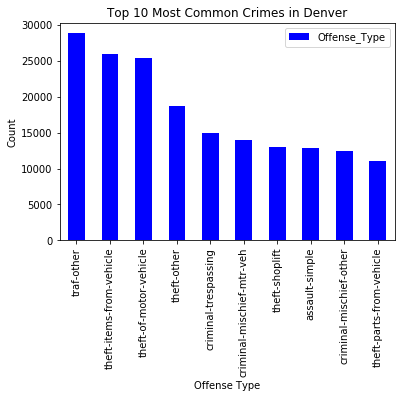

None


In [2]:
# Filter out traffic violations
crime = df[df['IS_CRIME']==1]

# Generate a bar plot showing number of data points for each type
group = crime.groupby('Offense_Type')

# Create a dataframe counting the number of data points for each type
count = pd.DataFrame(group['Offense_Type'].count().sort_values(ascending=False)[:10])


# Create a bar chart based off of the group series from before and label the title
bar = count.plot(kind='bar', title="Top 10 Most Common Crimes in Denver", color="blue")

# Set the xlabel and ylabel using class methods
bar.set_xlabel("Offense Type")
bar.set_ylabel("Count")

print(plt.show())

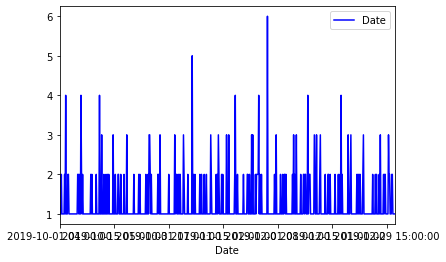

In [3]:
# Filter to top crime so it won't take so long to load
top = crime.loc[(crime['Offense_Type']=="traf-other") & (crime['Date'] >= '2019-1-1') & (crime['Date'] <= '2019-12-31')]

# Generate a group showing number of data points for date
groupdate = top.groupby('Date')

# Create a dataframe counting the number of data points for date
countdate = pd.DataFrame(groupdate['Date'].count())

# Create a line chart based off of the group series
line = countdate.plot(color="blue")

The r-squared is: 0.23336192679012055


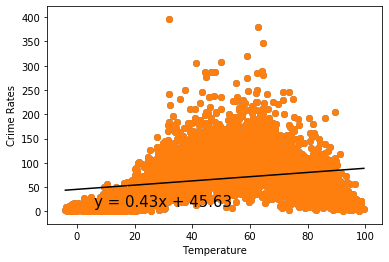

In [32]:
# Generate a group showing number of data points for date
grouptemp = crime.groupby('Temp')

# Create a dataframe counting the number of data points for date
counttemp = pd.DataFrame(grouptemp['Temp'].count())

# Plot out temp versus crime rate
x_values = counttemp.index
y_values = counttemp.Temp
plt.scatter(x_values,y_values)
plt.xlabel('Temperature')
plt.ylabel('Crime Rates')

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")
plt.savefig('tempcrimereg.png')
plt.show()

In [30]:
# Attempting a chi-square test
observed = pd.Series([28867,25916,25348], index=["traf-other", "theft-items-from-vehicle", "theft-of-motor-vehicle"])

df2 = pd.DataFrame([observed]).T

# Add a column whose default values are the expected values
df2[1] = 26710.333

# Rename columns
df2.columns = ["observed", "expected"]

# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

# Run the chi square test with stats.chisquare()
stats.chisquare(df2['observed'], df2['expected'])

Power_divergenceResult(statistic=267.2422192065895, pvalue=9.31299636620266e-59)

The r-squared is: 0.045893399135512845


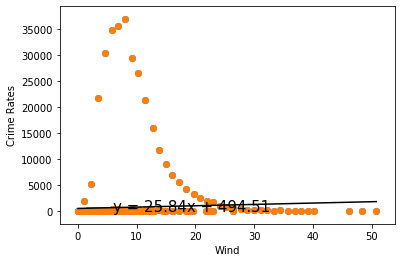

In [36]:
# Generate a group showing number of data points for date
groupwind = crime.groupby('Wind')

# Create a dataframe counting the number of data points for date
countwind = pd.DataFrame(groupwind['Wind'].count())

# Plot out temp versus crime rate
x_values = countwind.index
y_values = countwind.Wind
plt.scatter(x_values,y_values)
plt.xlabel('Wind')
plt.ylabel('Crime Rates')

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")
plt.savefig('tempcrimereg.png')
plt.show()

The r-squared is: -0.0005022142475868433


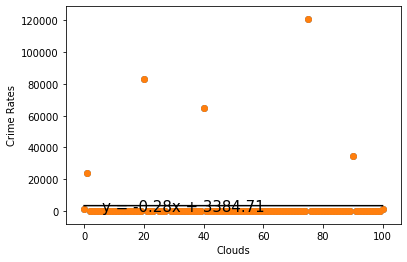

In [35]:
# Generate a group showing number of data points for date
groupcloud = crime.groupby('Clouds')

# Create a dataframe counting the number of data points for date
countcloud = pd.DataFrame(groupcloud['Clouds'].count())

# Plot out temp versus crime rate
x_values = countcloud.index
y_values = countcloud.Clouds
plt.scatter(x_values,y_values)
plt.xlabel('Clouds')
plt.ylabel('Crime Rates')

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(6,10),fontsize=15,color="black")

# Print out the r-squared value along with the plot.
print(f"The r-squared is: {rvalue}")
plt.show()